**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [10]:
# 1. Autoreloads modules when code is run
%load_ext autoreload 
%autoreload 2

# 1. Import the relevant packages
import numpy as np
from types import SimpleNamespace
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})

# 3. Import local user-written modules where we have the classes
from examproject import ProductionEconomyClass # Used for problem 1
from examproject import CareerChoiceModelClass # Used for problem 2
from examproject import BarycentricInterpolationClass # Used for problem 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [11]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [12]:
par.w = 1.0
market = ProductionEconomyClass()
errors = market.check_market_clearing()
print(errors)

p1 = 0.10, p2 = 0.10 -> excess demand 1 =   2.99530303, excess demand 2 =   7.05570707
p1 = 0.10, p2 = 0.31 -> excess demand 1 =   3.06039562, excess demand 2 =   2.17724116
p1 = 0.10, p2 = 0.52 -> excess demand 1 =   3.19234007, excess demand 2 =   1.18759403
p1 = 0.10, p2 = 0.73 -> excess demand 1 =   3.08810606, excess demand 2 =   0.63182163
p1 = 0.10, p2 = 0.94 -> excess demand 1 =   3.35375421, excess demand 2 =   0.36870529
p1 = 0.10, p2 = 1.16 -> excess demand 1 =   3.68625421, excess demand 2 =   0.17665817
p1 = 0.10, p2 = 1.37 -> excess demand 1 =   4.08560606, excess demand 2 =   0.02274575
p1 = 0.10, p2 = 1.58 -> excess demand 1 =   4.24877946, excess demand 2 =  -0.15315390
p1 = 0.10, p2 = 1.79 -> excess demand 1 =   4.78183502, excess demand 2 =  -0.26420509
p1 = 0.10, p2 = 2.00 -> excess demand 1 =   5.07871212, excess demand 2 =  -0.40165025
p1 = 0.31, p2 = 0.10 -> excess demand 1 =   0.84421447, excess demand 2 =   7.20758979
p1 = 0.31, p2 = 0.31 -> excess demand 1 =  

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [13]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [14]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [15]:
# Create an instance of CareerChoice with custom parameters if needed
career_choice_model = CareerChoiceModelClass()

# Run the simulation
career_choice_model.simulate_career_choices()

Average Expected Utility for each career track:
Career choice 1: 0.9804
Career choice 2: 1.9744
Career choice 3: 2.9766

Average Realized Utility for each career track:
Career choice 1: 0.9804
Career choice 2: 1.9744
Career choice 3: 2.9766


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

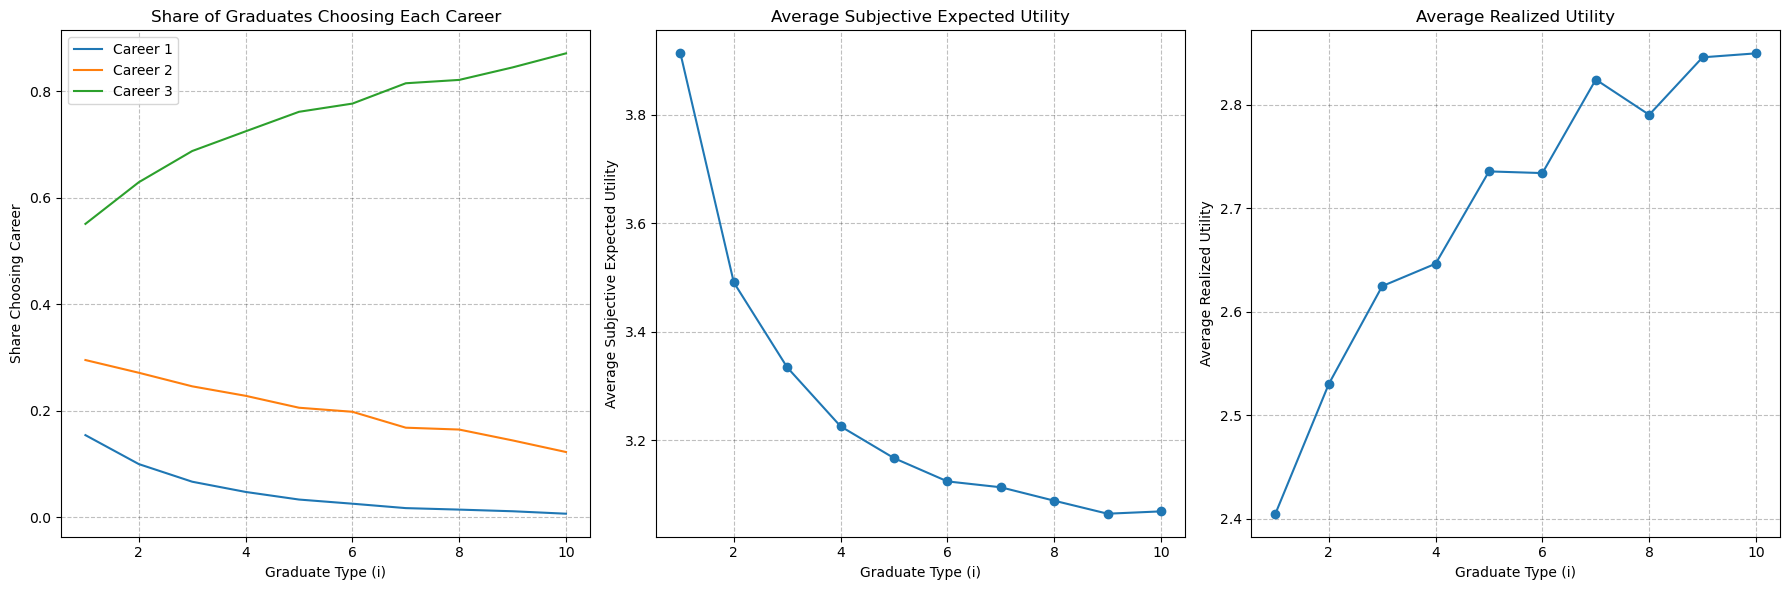

In [16]:
# Write your answer here 
career_choice_model.simulate_and_plot()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

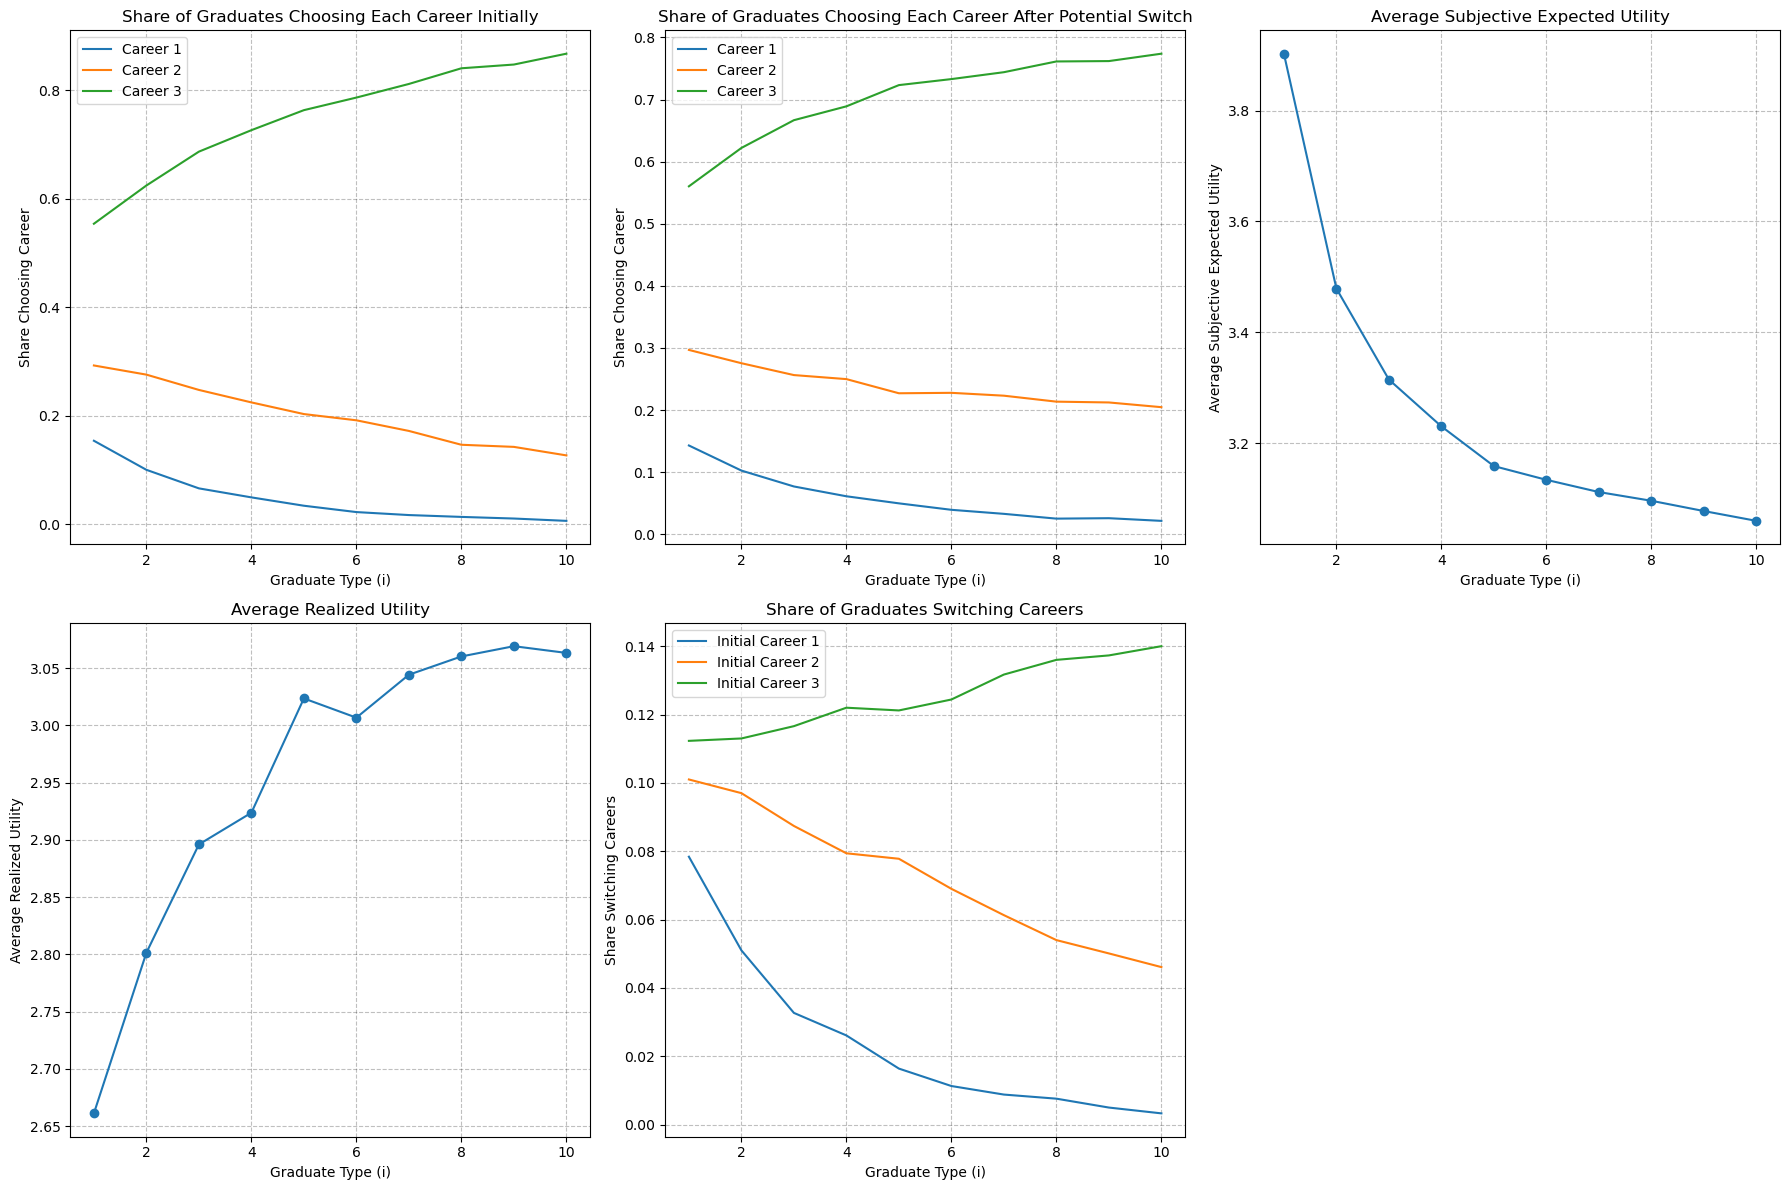

In [17]:
# write your answer here
career_choice_model.simulate_and_plot_switching()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.

**Sample:**

In [24]:
rng = np.random.default_rng(2024)
f = lambda x: x[0]*x[1]
X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))
F = np.array([f(x) for x in X])

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

The point A has the coordinates: [x-coorinate, y-coordinate] =  [0.26 0.44]
The point B has the coordinates: [x-coorinate, y-coordinate] =  [0.21 0.27]
The point C has the coordinates: [x-coorinate, y-coordinate] =  [0.1  0.28]
The point D has the coordinates: [x-coorinate, y-coordinate] =  [0.21 0.44]


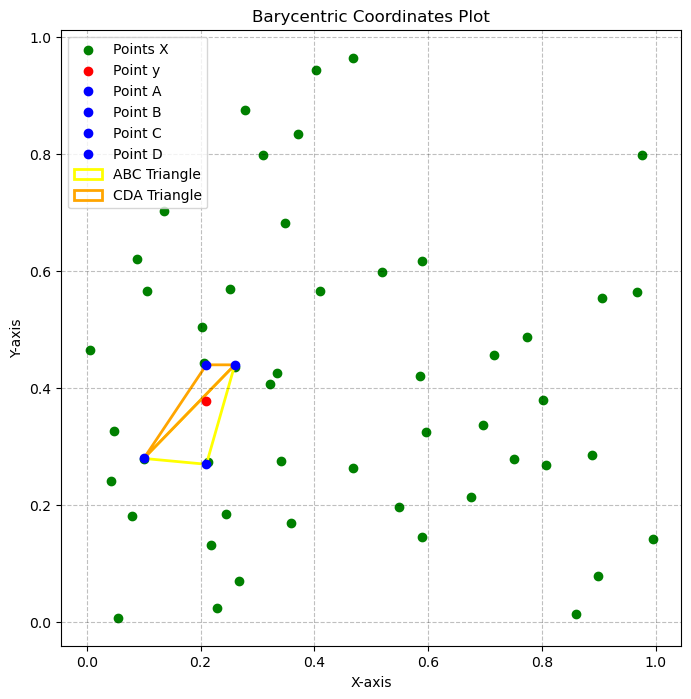

In [25]:
# 1. Initialize the class and find points
barycentric_interpolation = BarycentricInterpolationClass(X, F)
A, B, C, D = barycentric_interpolation.find_the_triangle_points(y)

# 2. Round the coordinates for the points
A = np.round(A, 2)
B = np.round(B, 2)
C = np.round(C, 2)
D = np.round(D, 2)

# 3. Print statements for the coordinates of the points
print("The point A has the coordinates: [x-coorinate, y-coordinate] = ", A)
print("The point B has the coordinates: [x-coorinate, y-coordinate] = ", B)
print("The point C has the coordinates: [x-coorinate, y-coordinate] = ", C)
print("The point D has the coordinates: [x-coorinate, y-coordinate] = ", D)

# 4. Plot the points and the two triangles ABC and CDA
def plot_points_and_triangles(X, y, A, B, C, D):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c='green', label='Points X')
    plt.scatter(*y, color='red', label='Point y', zorder=5)
    plt.scatter(*A, color='blue', label='Point A', zorder=5)
    plt.scatter(*B, color='blue', label='Point B', zorder=5)
    plt.scatter(*C, color='blue', label='Point C', zorder=5)
    plt.scatter(*D, color='blue', label='Point D', zorder=5)
    
    # Plot the CDA triangle
    ABC_triangle = plt.Polygon([A, B, C], edgecolor='yellow', fill=None, lw=2, label='ABC Triangle')
    plt.gca().add_patch(ABC_triangle)
    
    # Plot the CDA triangle
    CDA_triangle = plt.Polygon([C, D, A], edgecolor='orange', fill=None, lw=2, label='CDA Triangle')
    plt.gca().add_patch(CDA_triangle)
    
    plt.title("Barycentric Coordinates Plot")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_points_and_triangles(X, y, A, B, C, D)

Above, we can see the plot of the two triangles ABC and CDA, the random generated x points in the X-set, the points A, B, C, D. 

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# 1. The method which will compute the barycentric coordinates for the triangle ABC
r_ABC = barycentric_interpolation.barycentric_coordinates(A, B, C, D, y, triangle_type='ABC')

# 2. The method which will compute the barycentric coordinates for the triangle CDA
r_CDA = barycentric_interpolation.barycentric_coordinates(A, B, C, D, y, triangle_type='CDA')

# 3. Check which triangle y is inside
inside_triangle_ABC = barycentric_interpolation.inside_triangle_check(r_ABC)
inside_triangle_CDA = barycentric_interpolation.inside_triangle_check(r_CDA)

# 4. Print statements for if the point y is in the triangles
print("The point y is in the ABC triangle:", inside_triangle_ABC)
print("The point y is in the CDA triangle:", inside_triangle_CDA)

The point y is in the ABC triangle: True
The point y is in the CDA triangle: False


Above, we can see that the point y is only located in the triangle ABC. To check this result we can compute the values of the barycentric coordinates for the two triangles.

In [ ]:
print("Barycentric coordinates for triangle ABC are:")
print(f"    The first barycentric coordinate (rABC1) is: {r_ABC[0]}")
print(f"    The second barycentric coordinate (rABC2) is: {r_ABC[1]}")
print(f"    The third barycentric coordinate (rABC3) is: {r_ABC[2]}")
print("---------------------------------------------------")

print("Barycentric coordinatets for triangle CDA are:")
print(f"    The first barycentric coordinate (rCDA1) is: {r_CDA[0]}")
print(f"    The second barycentric coordinate (rCDA2) is: {r_CDA[1]}")
print(f"    The third barycentric coordinate (rCDA3) is: {r_CDA[2]}")

Barycentric coordinates for triangle ABC are:
    The first barycentric coordinate (rABC1) is: 0.62
    The second barycentric coordinate (rABC2) is: 0.09
    The third barycentric coordinate (rABC3) is: 0.29
---------------------------------------------------
Barycentric coordinatets for triangle CDA are:
    The first barycentric coordinate (rCDA1) is: 0.39
    The second barycentric coordinate (rCDA2) is: -0.23
    The third barycentric coordinate (rCDA3) is: 0.84


In [ ]:
print("Tests for triangle ABC:")
print(f"    The first barycentric coordinate (rABC1) is in the interval [0, 1]: {0 <= r_ABC[0] <= 1}")
print(f"    The second barycentric coordinate (rABC2) is in the interval [0, 1]: {0 <= r_ABC[1] <= 1}")
print(f"    The third barycentric coordinate (rABC3) is in the interval [0, 1]: {0 <= r_ABC[2] <= 1}")
print("--------------------------------------------------------------------------")
print("Tests for triangle CDA:")
print(f"    The first barycentric coordinate (rCDA1) is in [0, 1]: {0 <= r_CDA[0] <= 1}")
print(f"    The second barycentric coordinate (rCDA2) is in [0, 1]: {0 <= r_CDA[1] <= 1}")
print(f"    The third barycentric coordinate (rCDA3) is in the interval [0, 1]: {0 <= r_CDA[2] <= 1}")

Tests for triangle ABC:
    The first barycentric coordinate (rABC1) is in the interval [0, 1]: True
    The second barycentric coordinate (rABC2) is in the interval [0, 1]: True
    The third barycentric coordinate (rABC3) is in the interval [0, 1]: True
--------------------------------------------------------------------------
Tests for triangle CDA:
    The first barycentric coordinate (rCDA1) is in [0, 1]: True
    The second barycentric coordinate (rCDA2) is in [0, 1]: False
    The third barycentric coordinate (rCDA3) is in the interval [0, 1]: True


The first triangle, ABC is the same triangle as before. We see that the point y is located inside the triangle ABC and not in the triangle CDA. This makes sense, as all of the barycentric coordinates for the ABC-triagngle $r_1^{ABC}$, $r_2^{ABC}$, and $r_3^{ABC}$ are all within the interval $(0, 1)$, but the second barycentric coordinate for the CDA-triangle is negative. To get an understanding of why the y point is not in the triangle CDA, we can look at the barycentric cordinates.

Above, we see that the second barycentric coordinate for the triangle CDA is not in the interval $(0,1)$, and, therefore, it does not lie in this triangle.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
barycentric_interpolation = BarycentricInterpolationClass(X, F)
# 1. Calculate the interpolated value
interpolated_value = barycentric_interpolation.interpolate(y)

# 2. Calculate the true value given by the function, f(x) = f(x_1, x_2) = f(x_1) * f(x_2)
true_value = f(y)

# 3. Calculate the error defined as the difference between the interpolated value and the true value
error = np.abs(interpolated_value - true_value)

# 4. Print statements for the interpolated value, true value, and error
print("The interpolated value:", round(interpolated_value, 4))
print("The true value:", round(true_value, 3))
print("The error:", round(error, 4))

The interpolated value: 0.0842
The true value: 0.079
The error: 0.0052


**Question 4:** Repeat question 3 for all points in the set $Y$.

**Note**: We have removed one of the (0.8, 0.2) points. 

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.5,0.5)]

In [ ]:
# 1. We now do the same as in question 3, but here we will use for-loops to loop through the points in the Y-set
# a. Define an empty list, where the values (interpolated values, true values, and errors) will be appended to
values = []

# 2. A for-loop for calculating the interpolated value, the true value and error for each point the set Y 
for y in Y:
    # a. Calculate the interpolated values from the interpolate-function
    interpolated_value = barycentric_interpolation.interpolate(np.array(y))
    # b. Calculate the true value using the function f(x) = f(x_1) * f(x_2)
    true_value = f(np.array(y))
    # c. Calculate the error defined as the difference between the interpolated values and 
    error = np.abs(interpolated_value - true_value)
    # d. Append the points, interpolated values, true values, and errors to the list
    values.append((y, interpolated_value, true_value, error))

# 3. A for-loop for the print statements of the results for each point in the set Y
for y, interpolated_value, true_value, error in values:
    print(f"Point {y}:")
    print(f"  The interpolated value: {round(interpolated_value, 4)}")
    print(f"  The true value: {round(true_value, 2)}")
    print(f"  The error: {round(error, 4)}")
    print("---------------------------------")

Point (0.2, 0.2):
  The interpolated value: 0.0402
  The true value: 0.04
  The error: 0.0002
---------------------------------
Point (0.8, 0.2):
  The interpolated value: 0.159
  The true value: 0.16
  The error: 0.001
---------------------------------
Point (0.8, 0.8):
  The interpolated value: nan
  The true value: 0.64
  The error: nan
---------------------------------
Point (0.5, 0.5):
  The interpolated value: 0.2516
  The true value: 0.25
  The error: 0.0016
---------------------------------


From the print statements above, it can be seen that in the point $(0.8, 0.8)$ in the Y-set, there is no interpolated value. This is because it lies out from both the triangle ABC and the triangle CDA, and, therefore, we cannot use the barycentric coordinates to interpolate the value. We computed the algorithm to return "NaN", when the interpolation fails. But the true value can still be calculated using the function given, $f(y) = f(y_1, y_2) = f(y_1) \cdot f(y_2)$ or $f(y) = f(y[0], y[1]) = f(y[0]) \cdot f(y[1])$ in Python code language. Furthermore, we see that the error is lowest for the point $(0.2, 0.2)$ with an error of $0.0002$.